> ## **Métodos Computacionales II - Taller #5**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [62]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

---

**1. Ecuación Diferencial de Poisson:** Resolver la ecuación diferencial de Poisson:

$$\nabla^{2}u(x, y) = e^{-xy}$$

en un dominio cuadrado $(x, y) \in [0, 20] \times [0, 20]$ cm$^{2}$, con un paso espacial de $h = 0.1$ cm. El problema se encuentra sujeto a las condiciones de frontera:

$$h_{1}(0, y) = 10 \text{ V}$$

$$h_{2}(20, y) = 0 \text{ V}$$

$$h_{3}(x, 0) = 0 \text{ V}$$

$$h_{4}(x, 20) = 0 \text{ V}$$

---

In [79]:
Min,Max,N = 0,20,100

x = np.linspace(Min,Max,N)
y = x.copy()
dx = x[1] - x[0]
dy = y[1] - y[0]

In [80]:
def h1(x):
    return 10

def h2(x):
    return 0

def h3(y):
    return 0

def h4(y):
    return 0


In [88]:
def InitT():
    T = np.zeros((N,N))
    T[-1,:] = h3(x)
    T[:,-1] = h4(x)
    T[0,:] = h3(y)
    T[:,0] = h1(y)

    
    return T
    

In [89]:
T = InitT()
T

array([[10.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.]])

In [90]:
def f(x,y):
    return np.exp(-x*y)

In [91]:
def GausSeidel(x,y,T,omega=0.7,Nit = int(1e5), tolerancia = 1e-3,):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                Tij = (dy**2 * (T[i+1,j] + T[i-1,j]) + dx**2 * (T[i,j+1]+T[i,j-1]) - dx**2 * dy**2 * f(x[i],y[j]))/(2*(dx**2 + dy**2))
                
                # Matriz resta
                r = omega*(Tij - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax

In [92]:
Tf1,_ = GausSeidel(x,y,T)

  2%|█▎                                                                        | 1832/100000 [02:46<2:28:50, 10.99it/s]

1832


<IPython.core.display.Javascript object>


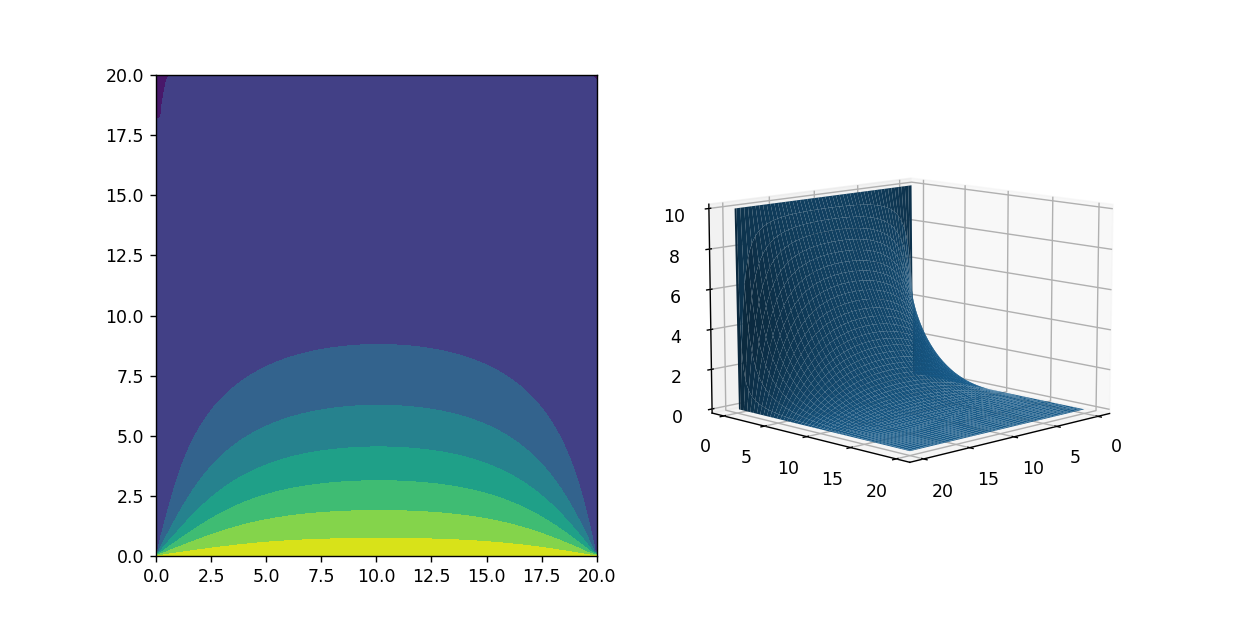

In [93]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,Tf1.T)

ax1.plot_surface(X,Y,Tf1.T)

---

**2. Conducción de calor 2D:** Resolver la ecuación diferencial de conducción de calor $2D$ en el siguiente dominio rectangular $(x, y) \in [0, 1] \times [0, 1]$, $t \geq 0$. $\alpha = \beta = 1$, la discretización es $\Delta{x} = \Delta{y} = 0.2$ y $\Delta{t} = 0.1$. $T_{max} = 1$ s. La ecuación diferencial tiene las siguientes condiciones:

(a) Condición inicial:

$$u(0, x, y) = \sin(\pi(x + y))$$

(b) Condiciones de frontera:

$$u(0, y, t) = e^{-2\pi^{2}t}\sin(\pi{y})$$

$$u(x, 0, t) = e^{-2\pi^{2}t}\sin(\pi{x})$$

$$u(x, 1, t) = e^{-2\pi^{2}t}\sin(\pi{(1 + x)})$$

$$u(1, y, t) = e^{-2\pi^{2}t}\sin(\pi{(1 + y)})$$

---

---

**3. Ecuación de Onda 2D, Coordenadas Cilíndricas:** Muestre que la ecuación que describe el método de solución de la ecuación de onda en dos dimensiones considerando coordenadas cilíndricas tiene la forma:

$$u_{i, j}^{l + 1} = \nu^{2} \cdot \left[u_{i + 1, j}^{l} - 2u_{i, j}^{l} + u_{i - 1, j}^{l} + \frac{\Delta\rho}{\rho[i]} \cdot \left(u_{i, j}^{l} - u_{i - 1, j}^{l}\right) + \left(\frac{\lambda}{\rho[i]}\right)^{2} \cdot \left(u_{i, j + 1}^{l} - 2u_{i, j}^{l} + u_{i, j - 1}^{l}\right)\right] + 2u_{i, j}^{l} - u_{i, j}^{l - 1}$$

Dados

$$\lambda := \frac{\Delta\rho}{\Delta\phi} \quad \text{ y } \quad \nu := \frac{\alpha\Delta{t}}{\Delta\rho}$$

---

---

**5. Ecuación de Onda en 2D:** Resuelva la ecuación de onda en dos dimensiones:

$$\frac{\partial^{2}u(x, y, t)}{\partial{t}^{2}} = v^{2} \cdot \left(\frac{\partial^{2}u(x, y, t)}{\partial{x}^{2}} + \frac{\partial^{2}u(x, y, t)}{\partial{y}^{2}}\right)$$

donde $v = 2$ m$/$s, con $(x, y) \in R := [0, 2] \times [0, 2]$ m$^{2}$ y $t \geq 0$; con la condición inicial:

$$u(x, y, 0) = \sin(\pi{x})\sin(\pi{y})$$

La velocidad de la onda en $t = 0$ es cer0. Notar que la condición de contorno establece que las fronteras no cambian en el tiempo.

---